In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
X = df.loc[:, df.columns != 'label'].to_numpy()
y = df['label'].to_numpy()

In [5]:
X = X.reshape(42000, 28, 28)
X = X.reshape(42000, 28, 28)

In [6]:
X = X / 255.0

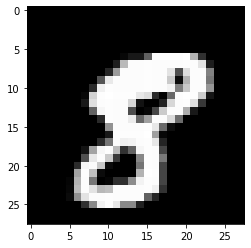

In [7]:
plt.imshow(X[10], cmap = 'gray')

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
x_test, x_dev, y_test, y_dev = train_test_split(x_test, y_test, test_size = 0.5)

In [10]:
model = Sequential([
    Conv2D(6, (5, 5), activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(16, (5, 5), activation = "relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(120, activation = "relu"),
    Dense(84, activation = "relu"),
    Dense(10, activation = "linear")
], name = 'my_model')

In [11]:
model.compile('adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
             )

In [12]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
919/919 [==============================] - 30s 6ms/step - loss: 0.2744 - accuracy: 0.9178 - val_loss: 0.0995 - val_accuracy: 0.9705
Epoch 2/10
919/919 [==============================] - 5s 6ms/step - loss: 0.0816 - accuracy: 0.9749 - val_loss: 0.0727 - val_accuracy: 0.9773
Epoch 3/10
919/919 [==============================] - 5s 6ms/step - loss: 0.0593 - accuracy: 0.9811 - val_loss: 0.0609 - val_accuracy: 0.9825
Epoch 4/10
919/919 [==============================] - 5s 5ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0450 - val_accuracy: 0.9859
Epoch 5/10
919/919 [==============================] - 5s 6ms/step - loss: 0.0345 - accuracy: 0.9882 - val_loss: 0.0409 - val_accuracy: 0.9862
Epoch 6/10
919/919 [==============================] - 5s 6ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0405 - val_accuracy: 0.9856
Epoch 7/10
919/919 [==============================] - 5s 6ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0448 - val_accuracy: 0.9863
Epoch

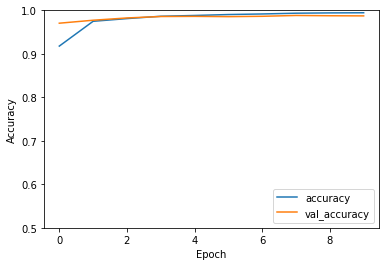

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [14]:
import os
model.save(os.path.join('models', 'DigitRecognizer.h5'))

In [15]:
logits = model.predict(x_dev)
y_dev_pred = tf.nn.softmax(logits)

197/197 [==============================] - 1s 3ms/step


In [16]:
y_dev_pred = np.argmax(y_dev_pred, axis = 1)

In [17]:
accuracy_score(y_dev, y_dev_pred)

0.9880952380952381

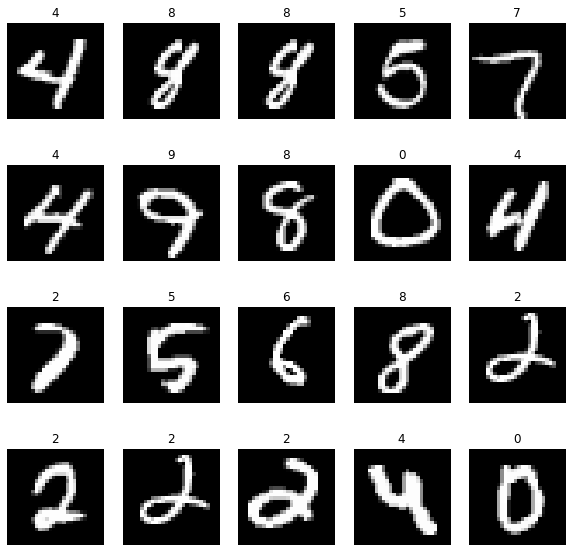

In [43]:
import random
plt.figure(figsize = (10, 10))
for i in range(20):
    ax = plt.subplot(4, 5, i+1)
    t = random.randint(0, 100)
    plt.imshow(x_dev[t] * 255, cmap = 'gray')
    plt.title(y_dev_pred[t])
    plt.axis("off")


# Test

In [44]:
test_df = pd.read_csv('test.csv')

In [45]:
test_X = test_df.to_numpy()

In [46]:
test_X.shape

(28000, 784)

In [47]:
test_X = test_X.reshape(28000, 28, 28)
test_X = test_X.reshape(28000, 28, 28)

In [48]:
test_X.shape

(28000, 28, 28)

In [49]:
test_X = test_X / 255.0

In [50]:
logits = model(test_X)
test_y_pred = tf.nn.softmax(logits)
test_y_pred = np.argmax(test_y_pred, axis = 1)

In [51]:
test_y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

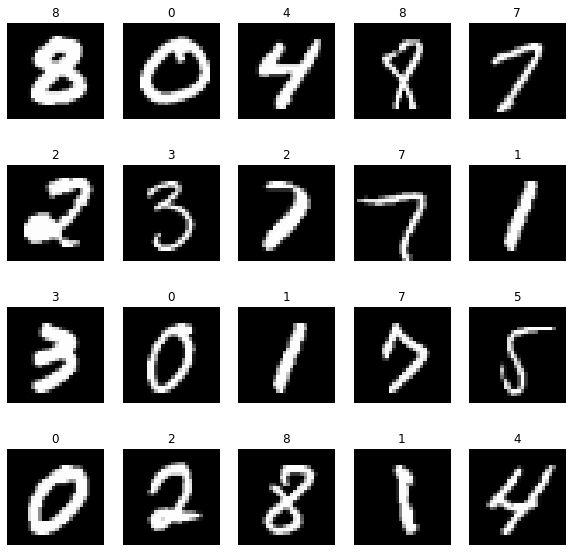

In [52]:
plt.figure(figsize = (10, 10))
for i in range(20):
    ax = plt.subplot(4, 5, i+1)
    t = random.randint(0, 100)
    plt.imshow(x_dev[t] * 255, cmap = 'gray')
    plt.title(y_dev_pred[t])
    plt.axis("off")


In [53]:
submission_df = pd.DataFrame({"Label" : test_y_pred})

In [54]:
submission_df.index += 1
submission_df.index.name = 'ImageId'

In [55]:
submission_df

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3
...,...
27996,9
27997,7
27998,3


In [56]:
submission_df.to_csv("submission.csv")